# [Entregável 2](https://docs.google.com/document/d/1JeGIkXKxqZwfo_ViF9-qEaKky4hfjy7qpSF1YJVJ_qQ/edit)

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset2.xls')

## a)  Esboce um gráfico de dispersão (scatterplot) do peso em função da altura. Que informações você tira desse gráfico? Você percebe algo unusual nele?

Text(0, 0.5, 'Massa')

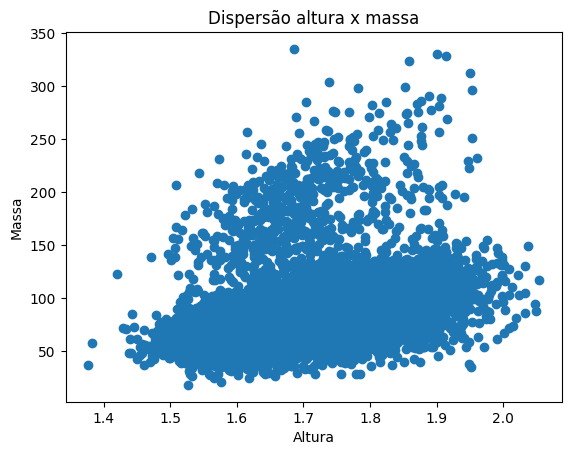

In [ ]:
plt.scatter(df['height'], df['weight'])
plt.title('Dispersão altura x massa')
plt.xlabel('Altura')
plt.ylabel('Massa')

Supondo que as alturas sejam dadas em metro (m), pois é compatível com a ordem de grandeza conforme o tipo de dado. As massas chegam na faixa de >300 unidades de massa, o que seria extremamente improvável para a população humana nessa faixa de altura caso a unidade fosse kilograma (kg). Porém, algumas massas chegam na faixa <50 unidades de massa, o que também seria improvável para a população humana nessa faixa de altura caso a unidade fosse libras (lbs). Pelos valores, é possível inferir que aconteceu algum problema na coleta dos dados. Algumas hipóteses:
1. Houve uma mistura de unidades: alguns dados estão em kg e outros em lbs.
2. Vários dados de massa foram coletados incorretamente por algum outro fator indeterminado.
3. Os dados estão corretos, Turingópolis é uma população bastante peculiar. Talvez tem ossos muito densos.

## b) Identificou-se que, no processo de integração entre 2 conjuntos de dados distintos, gerou-se uma  inconsistência em 2 features de nosso dataset. Identifique-as e corrija esses problemas.

Dica: pode ser que as mesmas observações apresentem os mesmo problemas.

Vamos investigar o dataset para descobrir as inconsistências.

In [ ]:
print("Entradas únicas de sexo:", df['sex'].unique())

Entradas únicas de sexo: ['M' 'F' 'male' 'female']


Pode-se notar que o sexo foi incluído de duas formas distintas: F/M e female/male. Vamos analisar cada uma delas.

In [ ]:
female_male = df.query("sex == 'male' or sex == 'female'")
female_male

,sex,age,height,weight
30,male,24,1.705208,182.135791
48,female,65,1.609532,145.446036
57,male,33,1.708634,126.539399
68,male,57,1.770826,121.244082
109,male,50,1.793294,239.725751
...,...,...,...,...
9957,female,63,1.674665,143.004450
9962,female,31,1.737863,144.781834
9984,female,45,1.632982,177.514903
9989,male,28,1.940960,195.461341


In [ ]:
F_M = df.query("sex == 'M' or sex == 'F'")
F_M

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9994,F,44,1.629277,83.618157
9995,M,68,1.999051,135.605141
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


Pode-se notar pela ordem de grandeza dos valores de massa que uma forte hipótese é que os dados preenchidos com F/M estão em kg e os dados preenchidos com female/male estão em lbs. Então, vamos converter lbs para kg, e padronizar em 0 para M ou male e 1 para F ou female.

In [ ]:
# Conversão kg para lbs
df.loc[((df['sex'] == 'male') ), ['weight']] *= 0.453592
df.loc[((df['sex'] == 'female') ), ['weight']] *= 0.453592

# Conversão sex para 0 ou 1
df.loc[((df['sex'] == 'M') ), ['sex']] = 0
df.loc[((df['sex'] == 'male') ), ['sex']] = 0
df.loc[((df['sex'] == 'female') ), ['sex']] = 1
df.loc[((df['sex'] == 'F') ), ['sex']] = 1
df

,sex,age,height,weight
0,0,62,1.874021,114.384199
1,1,44,1.672676,76.031332
2,1,49,1.587970,46.403086
3,1,25,1.653451,104.352744
4,0,65,1.744867,76.831890
...,...,...,...,...
9995,0,68,1.999051,135.605141
9996,1,33,1.601821,64.397853
9997,0,25,1.926656,131.105269
9998,1,32,1.844436,62.475271


## c) Crie uma nova coluna, IMC, a partir das colunas de peso e altura.

In [ ]:
df['imc'] = df['weight']/df['height']**2
df

,sex,age,height,weight,imc
0,0,62,1.874021,114.384199,32.569938
1,1,44,1.672676,76.031332,27.174950
2,1,49,1.587970,46.403086,18.401889
3,1,25,1.653451,104.352744,38.169932
4,0,65,1.744867,76.831890,25.235778
...,...,...,...,...,...
9995,0,68,1.999051,135.605141,33.933486
9996,1,33,1.601821,64.397853,25.098246
9997,0,25,1.926656,131.105269,35.319260
9998,1,32,1.844436,62.475271,18.364586


## d) Explique a diferença de outliers uni e multivariados. Utilize a coluna IMC para identificar outliers em nosso conjunto de dados. Estabeleça um critério lógico e, a partir desse critério, remova os outliers que julgar cabível. Nesse contexto, seriam esses outliers uni ou multivariados?

- Outliers univariados são valores atípicos em relação a uma única variável, por exemplo, valores altos ou baixos de mais na altura ou masa.  
- Outliers multivariados são valores atípicos em relação a mais de uma variável, por exemplo, valores altos ou baixos de IMC (pois o IMC relaciona massa com altura, 2 variáveis).

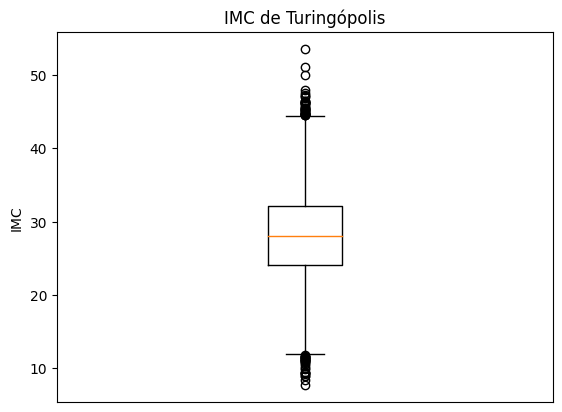

Limites inferior e superior: [11.931777214937675, 44.387350811742095]


In [ ]:
data = plt.boxplot(df['imc'])
plt.title("IMC de Turingópolis")
plt.ylabel("IMC")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()
limites=[item.get_ydata()[1] for item in data['whiskers']]
print("Limites inferior e superior:", limites)

Usando o boxplot, pode-se facilmente ver os outliers, são os valores abaixo do limite inferior e acima do superior. Vamos removê-los.

In [ ]:
superiores = np.where(df['imc'] >= limites[1])[0]
inferiores = np.where(df['imc'] <= limites[0])[0]
df.drop(index = superiores, inplace = True)
df.drop(index = inferiores, inplace = True)

Esses outliers são multivariados, pois envolvel altura e massa.

## e) Qual a porcentagem da população poderia se enquadrar fora da condição “saudável” de peso (com base no IMC)?

In [ ]:
saudavel = df.query("imc >= 18.5 and imc <= 24.9")
num_saudavel = "{:.2f}".format(100*len(saudavel)/len(df))
print(num_saudavel, '% da população é saudável.', sep='')

24.23% da população é saudável.


## f) Trace gráficos do tipo violino (violinplot) da altura e do peso em função do sexo e analise-os.

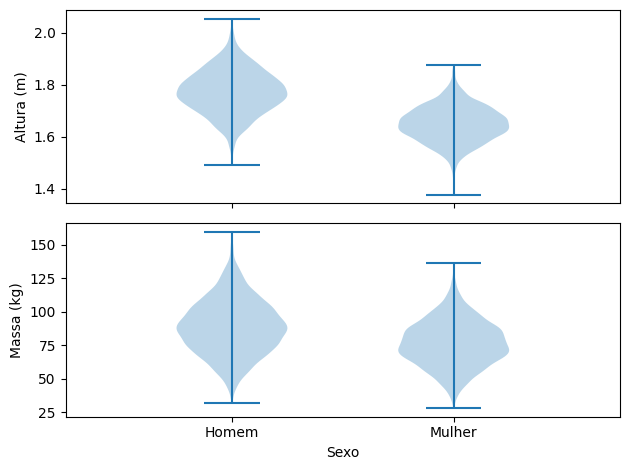

In [ ]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

M = df.query("sex == 0")
F = df.query("sex == 1")
data1 = [M['height'], F['height']]
data2 = [M['weight'], F['weight']]

fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].violinplot(data1)
axs[0].set(ylabel='Altura (m)')
axs[1].violinplot(data2)
axs[1].set(ylabel='Massa (kg)', xlabel='Sexo')

labels = ['Homem', 'Mulher']
set_axis_style(axs[1], labels)

fig.tight_layout()

Mulheres tendem a ser mais baixas e mais leves.